# DL Indaba Practical 1
# From linear to non-linear models
*Developed by Stephan Gouws, Avishkar Bhoopchand & Ulrich Paquet.*

**Introduction**

In this practical we will develop our intuition of machine learning models, and implement a linear and non-linear model from scratch that can classify a variant of the classic "swiss roll" dataset. We will then show how to do the same using the TensorFlow framework.

**Learning objectives**:
* Understand how the different ML components (data, model parameters, loss functions) work together.
* Understand the intuition of gradient-based optimization.
* Be able to derive gradients of the softmax loss wrt output dL/dOut, and wrt the model parameters dL/dW.
* Understand what is meant by a decision boundary & how it visualizes the models predictions.
* Understand the basics of TensorFlow, especially:
    * the computation graph abstraction (define-**and**-run vs define-**by**-run),
    * how TensorFlow can automatically derive gradients (relate it to the graph abstraction).

**What is expected of you:**
* Step through the cells and discuss the questions with your lab partner.
* Fill in the missing code sections ("# IMPLEMENT-ME") by pair-programming with your partner.
* Change the values for $w$ and $\alpha$, try out different regularization strengths, look at and discuss the decision boundaries.
* 5min before the end, pair up with someone else and explain the concepts from the Learning Objectives (above) to each other, and ask the tutors if you are stuck.
    

# Building Intuitions: Our First Classifier on Simple Toy Data

Run the code in the cell below, and look at the resulting plot. It should produce a simple 2D data set consisting of 2 classes of points, a weight vector in black, and a decision boundary in red. The goal is to obtain a decision boundary that best separates the different classes of points.

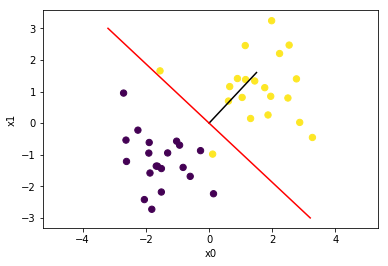

In [5]:
import numpy as np                 # Numpy is an efficient linear algebra library.
import matplotlib.pyplot as plt    # Matplotlib is used to generate plots of data.

centre = 1.0
points_in_class = 20
# Setting a random seed allows us to recreate the same data each time we run the cell.
np.random.seed(0)

# Generate random points in the "positive" class
x_pos = np.random.normal(loc=centre, scale=1.0, size=[points_in_class, 2])     
# Generate random points in the "negative" class
x_neg = np.random.normal(loc=-centre, scale=1.0, size=[points_in_class, 2])    
# Put these together
x = np.concatenate((x_pos, x_neg), axis=0) 
    
# The class (or "y") value is +1 or -1 for the two classes
y_pos = np.ones(points_in_class)    
y_neg = - np.ones(points_in_class)
y = np.concatenate((y_pos, y_neg), axis=0)

# N is the total data set size
N = 2 * points_in_class

# Plot the data using Matplotlib
fig = plt.figure()    
plt.scatter(x[:, 0], x[:, 1], c=y, s=40)
plt.axis('equal')

# Pick a weight vector. In the exercise below, you are going to change the
# values in this weight vector to see how the decision boundary changes.

w = [1.5, 1.6]    # CHANGE ME!! 

# Add the weight vector to the plot.
plt.plot([0, w[0]], [0, w[1]], 'k-')

# Plot part of the decision boundary in red. It is orthogonal to the weight vector.
t = 2
plt.plot([-t * w[1], t * w[1]], [t * w[0], -t * w[0]], 'r-')

# Add some labels to the plot and display it
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

# What do parameters do?

* Change the line `w = [0.5, 1.6]` to use different values, and re-run the above code.

* How does the decision boundary (the red line) change?

* For what values of $x_0$ and $x_1$ is the inner product between $w$ and $x$ positive? negative? zero?
 * Can you relate this to the decision boundary? 
 * Can you use this to determine the class labels $y$?

* By changing $w$, can you manually find a weight vector that does a good job of discriminating between the two classes?
    * How did you manually find it? What made you move from one choice to the next?

* Now that you've found it manually, chat with your friend next to you.
    * How will you find it automatically?
    * Can you devise a function, where minimizing it does the same thing as the way you manually searched?
    * Pause here and think.
        * Which values of $w$ give "bad solutions", according to you?
        * Which ones give good solutions?

* Try to draw the function that you devised on a piece of paper. It should be small when $w$ gives a "good solution", and it should be big when $w$ gives a "bad solution". Be creative and think of your own function. Show your drawing to your neighbour.

DO NOT PROCEED ANY FURTHER UNTIL YOU'VE THOROUGHLY ATTEMPTED ALL THE ABOVE QUESTIONS. (Ask your tutors for help if you're stuck!)

# A loss function of w

* Below we will formulate the above as a **loss function**.

* Run the code below, and look at the plot of the loss function. Note that it is not in x-space (***data***) any more, but that our axis labels are w[0] and w[1] (***parameters***)!

* Are the weights $w$ that you found manually close to the minimum of the loss function?


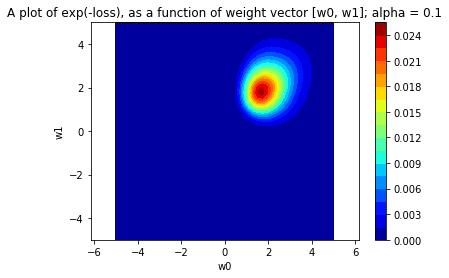

In [4]:
def compute_loss(w0, w1, x, y, alpha):
    # We start with a regularizer.
    
    # What is its effects on the loss function? Does it change the loss function's
    # minimum?
    
    # Note: In this practical we won't see too much benefit from this as we don't
    # have a    separate test set, but it is good practice to include one and will 
    # become very important soon enough!
    
    loss = alpha * (w0 * w0 + w1 * w1)
    
    # Add the data point's contribution to the loss. We do this for every data
    # point. (We don't have to do it in a for-loop, but below, you can really see
    # what is happening...)
    for n in xrange(N):
        
        # Get the inner product x' * w for data point x.
        inner = w0 * x[n, 0] + w1 * x[n, 1]
        
        # Now look at the plot with a weight vector in our "data space".
        loss += np.log(1 + np.exp(- y[n] * inner))
    
    return loss
    
lim = 5
ind = np.linspace(-lim, lim, 50)
w0, w1 = np.meshgrid(ind, ind)

# You will change the value of alpha (below), to see how the loss function
# changes. It has to be alpha >= 0. No negative values (otherwise the loss
# function's minimum is at negative infinity)!
alpha = 0.1
loss = compute_loss(w0, w1, x, y, alpha)

fig = plt.figure()
plt.contourf(w0, w1, np.exp(-loss), 20, cmap=plt.cm.jet)
cbar = plt.colorbar()
# We plot exp(-1oss) here, to let the colours show clearly in the plot. This is
# incidentally also proportional to the joint distribution
# p(y, w | x) = p(y | x, w) p(w), which you'll encounter on Wednesday in the
# Indaba, and can safely ignore for now.
plt.title('A plot of exp(-loss), as a function of weight vector [w0, w1]; '
                    + 'alpha = ' + str(alpha))
plt.xlabel('w0')
plt.ylabel('w1')
plt.axis('equal')
plt.show()

# Trying different loss functions

* As a first exercise, look at the function that computes the loss. There is a for-loop, essentially a sum.
    * Can you write down the loss function on a piece of paper? As a mathematical expression...
    
* On a piece of paper, can you draw
                log(1 + exp(- y[n] * inner))
    as a function of the inner product, the value of $y$, etc.
    * When is it almost zero, and the contribution to the loss is neglible?
    * Where does it become almost linear?
        
        After you've done your drawings, explain to yourself why the function is equivalent to
                inner = y[n] * (w0 * x[n, 0] + w1 * x[n, 1])     
                loss += np.log(1 + np.exp(- inner))
        What is the effect of the class label $y$ on the weight vector. What happens if we multiply a weight vector with -1?

* Now change the setting of alpha. Make it bigger, and smaller. What happens to the minimum?

# Working with More Complex Data

Real-world data is unfortunately not as simple as our toy bimodal Gaussian example above. Real data (e.g. pixels from vision, or speech phonemes, or words of a language) can have very complex, high-dimensional distributions. Before we get our hands dirty with that, we'll move one step up and work with another toy dataset, but this time non-linear.

In [6]:
import numpy as np    # Numpy is an efficient linear algebra library.
import matplotlib.pyplot as plt    # Matplotlib is used to generate plots of data.

def reset_matplotlib():
    %matplotlib inline
    plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
    plt.rcParams['image.interpolation'] = 'nearest'
    plt.rcParams['image.cmap'] = 'gray'

reset_matplotlib()
# for auto-reloading external modules
# (if you're curious, see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2

Let's generate a dataset with three spirals arranged in a swiss-roll type structure, and where each spiral forms a "class" that we want to be able to classify (i.e. the classes are very non-linearly distributed).

## Hyperparameters

First we define some hyperparameters that will be used by the next few cells. Try changing these values to see how the models work with different data.

In [7]:
num_classes = 3    # The number of classes (distinct groups) of data (these are our "y" values)
dimensions = 2    # The number of dimensions of our input or "X" values
points_per_class = 100    # number of X points to generate for each of the y values

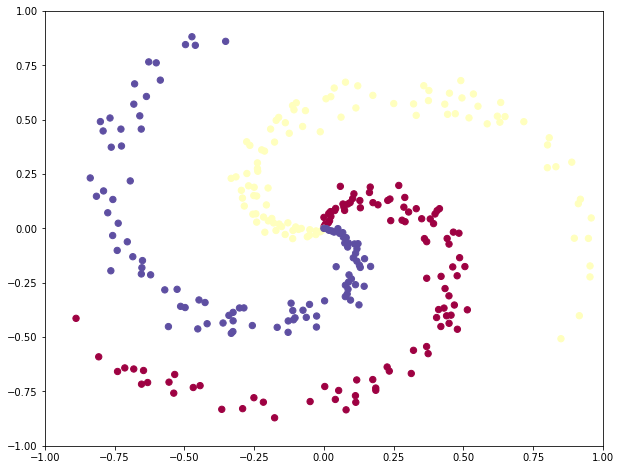

In [8]:
# Setting a random seed allows us to get the exact same data each time we run 
# the cell.
np.random.seed(0)    

def generate_spiral_data(num_classes, dimensions, points_per_class):
    """Generate `num_classes` spirals with `points_per_class` points per spiral."""
    
    X = np.zeros((points_per_class*num_classes, dimensions), dtype='float32')    # Create an empty matrix to hold our X values
    y = np.zeros(points_per_class*num_classes, dtype='uint8')    # Create an empty vector to hold our y values

    for y_value in xrange(num_classes):     # Generate data for each class
        ix = range(points_per_class*y_value, points_per_class*(y_value+1))    # The indices in X and y where we will save this class of data

        radius = np.linspace(0.0, 1, points_per_class)    # Generate evenly spaced numbers in the interval 0 to 1
        theta = np.linspace(y_value*4, (y_value+1)*4, points_per_class) + np.random.randn(points_per_class) * 0.2    

        X[ix] = np.column_stack([radius*np.sin(theta), radius*np.cos(theta)])     # Convert polar coordinates to standard Euclidian coordinates
        y[ix] = y_value
    
    return X, y
    
    
def plot_data(X, y):
    """Use Matplotlib to plot X, y data on a figure."""
    fig = plt.figure()
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    return fig

X, y = generate_spiral_data(num_classes, dimensions, points_per_class)
fig = plot_data(X, y)

# fig.savefig('spiral_raw.png')    # Uncomment this line if you want to save your image to a file

Let's look quickly at some of the raw values to get a better sense of the datastructure:

In [9]:
idx = np.random.choice(range(y.size), size=10, replace=False)
print "X values: \n", X[idx,]
print
print "Y values: \n", y[idx]



X values: 
[[ 0.07453433  0.08240335]
 [-0.02794273 -0.01172508]
 [ 0.02408017  0.07713684]
 [-0.33180022 -0.48284459]
 [ 0.08547524 -0.08594394]
 [-0.19078229  0.45670244]
 [-0.67819595  0.66452307]
 [ 0.11460172 -0.79991317]
 [-0.31485459  0.23675902]
 [ 0.41948399 -0.45131844]]

Y values: 
[0 1 0 2 2 1 2 0 1 0]


# Implementing a Classifier from Scratch
Before experimenting with libraries like TensorFlow, we start by implementing a *simple linear classifier* and then a *more complex nonlinear classifier* from scratch in Numpy. This allows us to be able to go through all the low-level details of how to make predictions and how to train our models, as these details are very important. 

Later on, we will then reimplement these two classifiers using TensorFlow, and hopefully we will see that this makes things much easier (especially as the models get more complex!).

## Implementing a linear classifier
How do we define and train a model that learns to separate the num_classes different classes, based on their coordinates in X space? We start by using a **linear classifier**.

A classifer is a function that takes an object's characteristics (or features) as inputs and outputs a prediction of the class (or group) that the object belongs to. It may make a single prediction for each input or it may output some score (for example a probability) for each of the possible classes. A classifier is **linear** when the scores are derived through some [linear combination](https://en.wikipedia.org/wiki/Linear_combination) of the input features. An input feature can, for example, be a projection of the raw data onto some basis functions.



The linear classifier we will implement computes the scores for a given input X using the formula $z = Wx + b$ where $W$ is a weight matrix of shape $[d, k]$ where $d$ is the dimensionality of the input and $k$ is the number of possible classes and $b$ is a bias vector of length $k$. 

By normalising the output score vector, using the so-called [**softmax**](https://en.wikipedia.org/wiki/Softmax_function) function, we can derive a probability distribution: 

$y'(j) = P(y=j\ |\ z) = \frac{e^{z_j}}{\sum_{i=1}^k e^{z_i}}$

Here j refers to the jth possible class and $z_j$ to the jth element of vector $z$. 

In this probabilistic form, we can also describe the classifier as a linear **discriminitive** classifier. This means that it directly models the probability distribution of the unobserved class conditioned on ("given") the input. In contrast, **generative** models, which we will encounter later in the Indaba, model the generative process of the data. 

Finally, we need to define a loss function, such that minimising the loss function by gradient descent, results in parameters $W$ and $b$ which make good predictions about the class of each input $X$. For this purpose we use the **cross entropy** loss (also called the negative log likelihood loss). The cross entropy loss compares two probability distributions, the true distribution $y$ and the predicted distribution from our classifier, $y'$ using the formula:

$H(y, y') = - \sum_{j=1}^k y(j)log[y'(j)] $

Here the "probability distribution" $y$ is the so called "one-hot" encoding of the true class of the particular example. 
Earlier in the practical, you experimented with a loss function that looked like this (in code):

```
inner = y[n] * (w0 * x[n, 0] + w1 * x[n, 1])     
loss += np.log(1 + np.exp(- inner))
```
        
Can you figure out how the cross entropy loss we defined here, combined with the softmax function, compares to this when **k=2**? And if we restrict our y values to be in the set {-1, 1}?


Let's implement these in Numpy! 

(Remember that Numpy is a linear algebra library that works most efficiently with vector and matrix operations, try to define all your formulas in vector and matrix form, rather than using loops!)

### Define the hyperparameters

Model hyperparameters include all choices about a model that are made prior to training. In a sense, these are the "meta parameters": parameters chosen by the practitioner and are not set by the optimization algorithm. This includes choices of learning rate, number of examples in a batch, etc.

In [10]:
learning_rate = 1e-0    # "Step-size": How far along the gradient do we want to 
                                            # travel when doing gradient descent?
reg_lambda = 1e-3    # Regularization strength.

# Define the initial random value of W here so we can re-use it later.
# There are various initialization schemes that exist, and we will see later    
# how these can have a big influence on model training. For now we will just
# initialize our weights with random normal(0, 0.01) values.

W_init = 0.01 * np.random.randn(dimensions, num_classes)

### Defining helper functions
Begin by defining some re-usable helper functions. You may want to look ahead to the `LinearModel` class before implementing these to see how they get used. 

In [11]:
## IMPLEMENT-ME: All 3 below.

def softmax(logits):
    """Convert un-normalised model scores(logits) into a probability distribution.

    Args:
        logits: The un-normalised scores assigned by the model.
    """
    exp_logits = np.exp(logits)
    # Notice this trick for numerical stability.
    #exp_logits -= np.max(exp_logits)
    probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)    
    return probs

def cross_entropy(predictions, targets):
    """Calculate the cross entropy loss given some predictions and target (true) values.

    Args:
        predictions: The model predictions (of shape [num_examples, num_classes])
        targets: The correct labels for the data (of shape [num_examples])
    """
    num_examples = predictions.shape[0]
    
    # NOTE: xent(pred, trgt) = -sum_i p_trgt[i] * log(pred[i]). But since we
    # use one-hot encodings for p_trgt[i], it means all p_trgt[i] are zero
    # except for the observed class. We therefore only compute the logs of the
    # predictions of the observed classes below. To do that, we use advanced
    # indexing X[[0, 1, 2, 3, ..., num_examples], target_ids] which extracts the 
    # predicted log-prob for the correct target class (target_ids) for each example.
    # QUESTION: Can you see why this works? Lookup "advanced indexing" if unsure.
    correct_logprobs = -np.log(predictions[range(num_examples), targets])
    
    # NOTE: When dealing with a batch of data, we compute the average cross
    # entropy over the batch (i.e. we want the average per-example loss).
    # QUESTION: Why do we use the average loss?
    crossentropy = np.sum(correct_logprobs) / num_examples
    return crossentropy

def l2_loss(parameters):
    """Calculate the L2 regularisation of a list of parameters."""
    reg = 0.0
    for param in parameters:
        reg += 0.5 * reg_lambda * np.sum(param * param)
    return reg

### Defining the linear model
Now we define the linear model itself. We put this in a class so that we can think of it as a "black box" that takes in our inputs and returns some predictions and a loss value that tells us how good our predictions are. We can also update the model using its update method. Doing it this way gives a clean separation between the model definition and training of the model and will be a useful pattern to use going forward.

#### Gradient-based optimization
Machine learning models assign a scalar cost/loss/error function $E(\theta)$ (these terms are largely interchangeable) to *how well the model is doing*, as a function of the model parameters $\theta$. We want to find a setting of the parameters $\theta$ that gives us the best model possible on our data. For this we use gradient-based optimization, and particularly stochastic gradient descent (we'll talk more about this in Practical 2). The SGD algorithm
computes the gradient $\frac{\partial E}{\partial \theta}$ on a sample of the data, and then takes a small step/update in the negative direction of the gradient (which minimizes $E$). I.e.

$\theta^{t+1} = \theta^t - \eta \frac{\partial E}{\partial \theta}$

Here, $\eta$ is referred to as the "learning rate". There's a lot more to say about this, but this is all we need for now. To implement this, we need to compute the gradients of the loss function wrt the model parameters.

#### Deriving the Softmax Gradients

Recall the definition of the softmax above, written in terms of the **logits** (unnormalized scores) $z$):

$P(y=j\ |\ z) = \frac{e^{z_j}}{\sum_{i=1}^k e^{z_i}}$

Our loss (error function) is the cross-entropy function:

$E = - \sum_k (\log p_k).y_k$, 

where $y_k$ is the **"one-hot" encoding** of the target class, so the terms of the sum is zero everywhere except for the observed class (i.e. we can ignore the sum and let $k$ be equal to the observed class). The above sum really just "picks out" one $\log p_k$ (compare this to the code for `cross_entropy()` above). We require the gradient of the loss with respect to the logits, i.e.

$\frac{\partial E}{\partial z_k} = - \frac{\partial}{\partial z_k} [ \log p_k ]$

By substituting the softmax equation for $p_k$, and expanding the log-quotient into two terms, we get (just the RHS for now)

$\frac{\partial}{\partial z_k} (\log(e^{z_k}) - \log \sum_j e^{z_j})$

where the first term reduces to 1, and the second is known as the "log-sum-exp". This arises frequently in normalized probabilistic models, and we can deal with that as follows:

\begin{aligned}
 \frac{\partial}{\partial z_k} \log \sum_j e^{z_j} &= 
     \frac{1}{\sum_j e^{z_j}} \left [ \frac{\partial}{\partial z_k} \sum_j e^{z_j} \right ] 
         && \vartriangleright \frac{d}{dx} \log f(x) = \frac{1}{f(x)} \frac{d}{dx}f(x)\\
 &= \frac{e^{z_k}}{\sum_j e^{z_j}}    
         && \vartriangleright    \frac{d}{dx} e^{f(x)} = e^{f(x)}    \frac{d}{dx}f(x) \\
 &= p_k
\end{aligned}

Putting it all together we get this elegant expression for the **softmax gradient**:

$\frac{\partial E}{\partial z_k} = - [1 - p_k ] = p_k - 1$.

#### What does this mean?

Look at the derivative. When is it big? When $p_k$ is far from one, and we mis-classified the point. The derivative is big and we have some more work to do! When is the derivative small? It is when $p_k \approx 1$. In that case, we correctly classified the point, and don't need to sweat and labour any more.


**NOTE**: The derivative is for each example, and in the full derivative, many data points play a role. The misclassified ones play a bigger role. So, we typically compute this for a *batch* of examples by computing the **average per-example cross-entropy** over the batch. 

**QUESTION**: Why do we compute the average loss? Hint: What happens to the loss as batch-size changes without averaging? Also, what happens to the gradients as batch-size changes? How could these be a problem? 

#### Deriving the Weights Gradients

We now have $\frac{\partial E}{\partial z_k}$ (the derivative of the loss with respect to the logit for class $k$). Next we want the gradient on the weights $W$. 

**QUESTION**: How can we compute $\frac{\partial E}{\partial W}$? **Note**: This is a derivative of a matrix (gradient). 

To derive this, let's think about the shape of W, and then derive the gradient on each of its elements first. W is a [input_dim, output_dim] matrix. Let $w_{ij}$ by the weight at W[i,j] (connecting input element $i$ to output class $j$). 

Now let's use the [chain rule](https://www.khanacademy.org/math/ap-calculus-ab/ab-derivative-rules/ab-chain-rule/a/chain-rule-review) to derive this:

$\frac{\partial E}{\partial w_{ij}} = \frac{\partial E}{\partial z_j} \frac{\partial z_j}{\partial w_{ij}}$

This gradient is the product of two terms. Notice that we already computed the first term above! So we just need the second term:

To start, notice that $z_j = x^T W_j + b_j = \sum_i x_i w_{ij} + b_j$ ($W_j$ is the j-th column of matrix W). Use this to answer the following question:

**QUESTIONs:**
1. Derive $\frac{\partial z_j}{\partial w_{ij}}$.
2. Now put this together to get $\frac{\partial E}{\partial w_{ij}}$.
3. Do the same for $\frac{\partial E}{\partial b_{j}}$.
4. Put these together to arrive at $\frac{\partial E}{\partial W}$ (a matrix) and $\frac{\partial E}{\partial b}$ (a vector) **HINT**: Think about the ingredients: the vector of activations $x$ and the vector of logits $z$. What is the dimension of each? Now think about the dimensions of W. Which linear algebra operator can take two vectors and output a matrix? :)



In [12]:
class LinearModel(object):
    def __init__(self):
        # Initialize the model parameters.
        self.W = np.copy(W_init)
        self.b = np.zeros((1, num_classes))
    
    def predictions(self, X):
        """Make predictions of classes (y values) given some inputs (X)."""
        # Evaluate class scores/"logits": [points_per_class*num_classes x num_classes].
        logits = self.get_logits(X)

        # Compute the class probabilities.
        probs = softmax(logits)
        
        return probs
    
    def loss(self, probs, y):
        """Calculate the loss given model predictions and true targets."""
        num_examples = probs.shape[0]
        data_loss = cross_entropy(probs, y)
        regulariser = l2_loss([self.W])
        return data_loss + regulariser
    
    def update(self, probs, X, y):    
        """Update the model parameters using back-propagation and gradient descent."""
        # Calculate the gradient of the loss with respect to logits
        dlogits = self.derivative_loss_logits(probs, y)    
        
        # Gradient of the loss wrt W
        dW = self.derivative_loss_W(X, dlogits)
        
        # Gradient of the loss wrt b
        db = self.derivative_loss_b(dlogits)
        
        # Don't forget the gradient on the regularization term.
        dW += self.derivative_regularisation()
        
        # Perform a parameter update.
        self.W += -learning_rate * dW
        self.b += -learning_rate * db
        
    
    ##### Now we define some helper functions     
    ## IMPLEMENT-ME: ...
    def get_logits(self, X):
        """Calculate the un-normalised model scores."""
        return np.dot(X, self.W) + self.b 

    def derivative_loss_logits(self, probs, y):
        """Calculate the derivative of the loss with respect to logits."""
        num_examples = y.shape[0]
        dlogits = probs
        dlogits[range(num_examples), y] -= 1
        dlogits /= num_examples
        return dlogits
    
    def derivative_loss_W(self, X, dlogits):
        """Calculate the derivative of the loss wrt W."""
        return np.dot(X.T, dlogits)
    
    def derivative_loss_b(self, dlogits):
        """Calculate the derivative of the loss wrt b."""
        return np.sum(dlogits, axis=0, keepdims=True)
    
    def derivative_regularisation(self):
        return reg_lambda * self.W     

### Training the linear model
Now that we've defined our "black box" linear model. We can train it on our dummy spiral dataset

In [13]:
# Define a function that trains a model for a given number of epochs 
# (iterations through the data).

def train_model(model, epochs, report_every, render_fn=None, render_args={}):
    frames = []
    for i in xrange(epochs):
    
        # Get the model predictions for our spiral dataset X.
        probs = model.predictions(X)

        # Compute the loss
        loss = model.loss(probs, y)

        # Print the loss value every `report_every` steps.
        if i % report_every == 0:
            print "iteration %d: loss %f" % (i, loss)
            if render_fn:
                frame = render_fn(**render_args)
                frames.append(frame)

        # Use back-propagation to update the model parameters:
        model.update(probs, X, y)    
        
    if frames: return frames

In [14]:
# Create an instance of our LinearModel.
linear_model = LinearModel()

# Now we train the linear model for 200 epochs.
train_model(linear_model, 200, 10)

iteration 0: loss 1.100447
iteration 10: loss 0.918496
iteration 20: loss 0.852024
iteration 30: loss 0.822591
iteration 40: loss 0.807724
iteration 50: loss 0.799528
iteration 60: loss 0.794729
iteration 70: loss 0.791794
iteration 80: loss 0.789940
iteration 90: loss 0.788739
iteration 100: loss 0.787946
iteration 110: loss 0.787414
iteration 120: loss 0.787053
iteration 130: loss 0.786806
iteration 140: loss 0.786634
iteration 150: loss 0.786515
iteration 160: loss 0.786432
iteration 170: loss 0.786373
iteration 180: loss 0.786332
iteration 190: loss 0.786303


### Evaluating the model
The training of the model should have converged to a value around 0.786 if you used the default data parameters earlier. (Convergence means that the loss decreases to a point and then stops decreasing). But how do we interpret this? Is our model actually good at making predictions? Let's work out the **accuracy** of the model to see:

In [15]:
# Define a function that calcuates and prints the accuracy of a model's predictions
def evaluate_model(model):
    # Get the probabilites/scores that the model assigns to each class for each X datapoint.
    scores = model.get_logits(X)    # The shape of scores is [num_data_points, num_classes]

    # The index of the maximum score along the 2nd dimension is the class that the model thinks is most likely (y^) for each datapoint.
    predicted_class = np.argmax(scores, axis=1)

    # What proportion of the class predictions made by the model (y^) agree with the true class values (y) ?
    print 'Accuracy: %.2f' % (np.mean(predicted_class == y))    

In [16]:
# Now evaluate the trained linear model
evaluate_model(linear_model)

Accuracy: 0.49


This is not a very good result (we are misclassifying around 50% of the data points, and these are data points that we've seen before!), lets visualise the decision boundary to determine what's going on.

### Visualizing the linear model's decision boundary

Let's visualize the decision boundary of this linear classifier on the swiss roll dataset.


In [17]:
# Define a function that plots the decision boundary of a model
def plot_decision_boundary(X, model, render=True):
    """Overlays the classifier's decision boundary on the dataset [X, y].
    
    Args:
        X: 2-d matrix input data,
        model: The model to evaluate
    """
    
    step_size = 0.02    # Discretization step-size
    
    # Get the boundaries of the dataset.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # Generate a grid of points, step_size apart, over the above region.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step_size),
                                             np.arange(y_min, y_max, step_size))
    
    # Flatten the data and get the logits of the classifier (the "scores") for 
    #     each point in the generated mesh-grid.
    meshgrid_matrix = np.c_[xx.ravel(), yy.ravel()]
    Z = model.get_logits(meshgrid_matrix)
    
    # Get the class predictions for each point.
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    
    old_backend = plt.rcParams['backend']    # Save backend.
    if not render:
        plt.rcParams['backend'] = 'agg'

    # Overlay both of these on one figure.
    fig = plt.figure()
    axes = plt.gca()

    axes.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    axes.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    if not render:
        # Now we can save it to a numpy array.
        fig.tight_layout(pad=0)
        fig.canvas.draw()
        data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
        data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        # Restore old backend
        plt.rcParams['backend'] = old_backend
        
        return data
    
    #fig.savefig('spiral_linear.png')

In [15]:
from matplotlib import animation
from IPython.display import display
from IPython.display import HTML

def display_frames_as_gif(frames):
        """
        Displays a list of frames as a gif.
        """
        plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
        patch = plt.imshow(frames[0])
        #plt.axis('off')

        def animate(i):
                patch.set_data(frames[i])

        anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
        ##display(display_animation(anim, default_mode='loop'))
        HTML(anim.to_html5_video())
        # METHOD 2
        #plt.rcParams['animation.html'] = 'html5'
        #anim        
        return anim

#display_frames_as_gif(frames)

In [18]:
# Plot the decision boundary of our trained linear model on the dataset X
# plot_decision_boundary(X, linear_model)

# Create an instance of our LinearModel.
reset_matplotlib()
linear_model = LinearModel()

train_model(linear_model, 200, 10)

# For rendering animations.
#frames = train_model(linear_model, 200, 10, 
#                                         plot_decision_boundary,
#                                        {'X':X, 'model':linear_model, 'render':False})

iteration 0: loss 1.100447
iteration 10: loss 0.918496
iteration 20: loss 0.852024
iteration 30: loss 0.822591
iteration 40: loss 0.807724
iteration 50: loss 0.799528
iteration 60: loss 0.794729
iteration 70: loss 0.791794
iteration 80: loss 0.789940
iteration 90: loss 0.788739
iteration 100: loss 0.787946
iteration 110: loss 0.787414
iteration 120: loss 0.787053
iteration 130: loss 0.786806
iteration 140: loss 0.786634
iteration 150: loss 0.786515
iteration 160: loss 0.786432
iteration 170: loss 0.786373
iteration 180: loss 0.786332
iteration 190: loss 0.786303


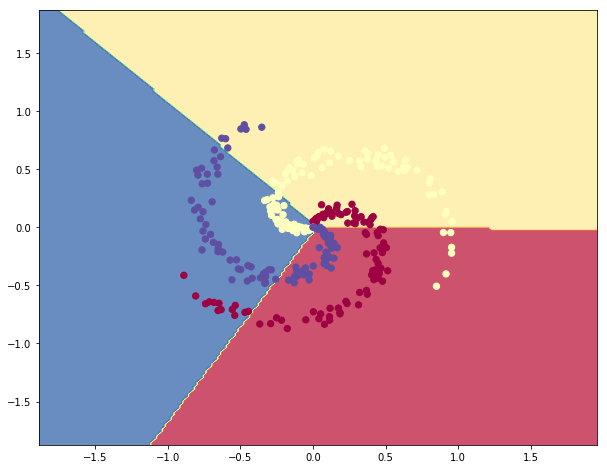

In [19]:
plot_decision_boundary(X, linear_model)

#reset_matplot_lib()
#anim = display_frames_as_gif(frames)

What can you deduce from this decision boundary? Does it help explain why the linear model makes bad predictions? 

## Using a nonlinear model

The linear model resulted in decision boundaries that were straight lines in 2D space. Using these straight lines, it is impossible to accurately separate our spiral-shaped data. We need a more complex model that can represent more complex (nonlinear) decision boundaries. Intuitively, we want a "curved" decision boundary that can adapt to the curved shape of the data. Let's see how converting our model to be a non-linear function of its parameters could resolve this. 

### Define the non-linear model
We define this as a class with the same interface as the LinearModel. This way we can reuse exactly the same training and evaluation functions we defined earlier!

**Forward pass**

So far the logits (scores) were a linear function of the inputs ($\Delta \textrm{logits} = W*\Delta \textrm{inputs}$; put another way, a small change in inputs leads to a proportionally small change in outputs). We can make the model more powerful by making logits a non-linear function of inputs, e.g. $\Delta\textrm{logits} = W_2 * \sigma(W * \Delta \textrm{inputs})$. Here, $\sigma$ is a nonlinear function (non-linearity / **activation function**). There are many different types, but a popular choice is the **rectified linear unit (ReLU)**:

$\sigma_\textrm{ReLU}(x) = \max(0, x)$

In code:

In [20]:
def relu(value):
    """ ReLU is the "Rectified Linear Unit activation function", defined as:
                relu(x) = x if x > 0, and 0 if x <= 0
    """
    return np.maximum(0, value)    

**QUESTION**: Why does adding this "non-linearity" make the model more powerful? **HINT**: Think about the decision boundary of the linear model above, and convince yourself that adding a nonlinearity allows the model more freedom in how it structures its decision boundary.

**Backward pass: Deriving the gradients** 

Our model has now changed a little, but notice that $W_2$ (which maps from the hidden layer to logits) is now doing the same thing as $W$ in our linear model, just on a transformed version of the inputs $z_2 = W_2h$, with the hidden layer activations $h = \sigma_{ReLU}(z_1)$ and $z_1 = Wx + b$. 

So the good news is that the *mechanics* of computing the gradient wrt $W_2$ will be similar to how we derived $\frac{\partial E}{\partial W}$ for the linear model above, but now we just need to replace 'input activations' $X$ with the 'hidden activations' $h$ (compare `derivative_loss_W2()` below with `derivative_loss_W()` in the linear model above). 

So all that's left is to compute $\frac{\partial E}{\partial W}$, the gradients on $W$ (the input-to-hidden layer weights; omitting the biases for now). For this, we will again use the chain rule to derive 

$\frac{\partial E}{\partial W} = \frac{\partial E}{\partial z_2} \frac{\partial z_2}{\partial z_1} \frac{\partial z_1}{\partial W}$

Convince yourself that this is again just an application of the [chain rule for derivatives](https://en.wikipedia.org/wiki/Chain_rule), but over a longer chain ($E\rightarrow z_2 \rightarrow z_1 \rightarrow W$)!

**NOTE**:
* The gradient on input weights W is a product of three terms.
* We already know the first term $\frac{\partial E}{\partial z_2}$.

**QUESTIONS**:
* Compute: $\frac{\partial z_2}{\partial z_1} = \frac{\partial W_2 h}{\partial z_1} = \frac{\partial W_2 \sigma_{ReLU}(z_1)}{\partial z_1} = \ldots$. **HINT**: For sigmoidal activations we use the identity $\frac{d}{dz} \sigma(z) = \sigma(z)(1 - \sigma(z))$. Can you derive this? 
* Compute: $\frac{\partial z_1}{\partial W}$. 

**ASIDE: What is happening here**:

So far we have been manually deriving the gradients of the loss wrt to all model parameters. Notice that a specific pattern is emerging:
 
* propagate activations forward through the network ("make a prediction"), 
* compute an error delta ("see how far we're off") , and 
* propagate errors backwards to update the weights ("update the weights to do better next time").
 
Derivatives of the loss with respect to the inputs of a layer (e.g. $\frac{\partial E}{\partial z}$) are referred to as (error) **delta**s.    For now we just need the gradients calculated above, but we will use this insight in the next practical when we show how this all forms part of a more general algorithm for efficiently computing gradients in deep neural networks (called **(error) back-propagation**).

Let's implement this:


In [21]:
learning_rate = 1e-0    # How far along the gradient do we want to travel when doing 
                                            # gradient descent?
reg_lambda = 1e-3    # Regularization strength
num_hidden = 100    # Size of hidden layer.

non_linear_W_init = 0.01 * np.random.randn(dimensions, num_hidden)
non_linear_W2_init = 0.01 * np.random.randn(num_hidden, num_classes)


In [22]:
class NonLinearModel(object):
    def __init__(self):
        # Initialize the model parameters.
        self.W = non_linear_W_init
        self.b = np.zeros((1, num_hidden))
        self.W2 = non_linear_W2_init
        self.b2 = np.zeros((1, num_classes))

    def predictions(self, X):
        """Make predictions of classes (y values) given some inputs (X)."""
        # Evaluate class scores/"logits": [points_per_class*num_classes x num_classes].
        logits = self.get_logits(X)

        # Compute the class probabilities.
        probs = softmax(logits)
        
        return probs
    
    def loss(self, probs, y):
        """Calculate the loss given model predictions and true targets."""
        data_loss = cross_entropy(probs, y)
        regulariser = l2_loss([self.W, self.W2])
        return data_loss + regulariser
    
    def update(self, probs, X, y):    
        """Update the model parameters using back-propagation and gradient descent."""
        hidden_output = self.hidden_layer(X)
        
        # Calculate the gradient of the loss with respect to logits
        dlogits = self.derivative_loss_logits(probs, y)    
        
        # Backpropagate the gradient to the parameters.
        
        # We first backprop into parameters W2 and b2.
        dW2 = self.derivative_loss_W2(hidden_output, dlogits)
        db2 = self.derivative_loss_b2(dlogits)

        # Next, backprop into the hidden layer.
        dhidden = self.derivative_hidden(hidden_output, dlogits)

        # Finally, backprop into W,b.
        dW = self.derivative_loss_W(X, dhidden)
        db = self.derivative_loss_b(dhidden)

        # Add regularization gradient contribution.
        dW2 += self.derivative_regularisation_W2()
        dW += self.derivative_regularisation_W()

        # Perform a parameter update (one step of gradient descent).
        self.W += -learning_rate * dW
        self.b += -learning_rate * db
        self.W2 += -learning_rate * dW2
        self.b2 += -learning_rate * db2
        

    ## DEFINE THE MODEL HELPER FUNCTIONS    
    
    def hidden_layer(self, X):
        """Calculate the output of the hidden layer."""
        return relu(np.dot(X, self.W) + self.b)
        
    def get_logits(self, X):
        """Calculate the logits from the input data X."""
        hidden_output = self.hidden_layer(X)
        logits = np.dot(hidden_output, self.W2) + self.b2
        return logits
    
    def derivative_loss_logits(self, logits, y):
        """Calculate the derivative of the loss with respect to logits."""
        num_examples = y.shape[0]
        dlogits = logits
        dlogits[range(num_examples),y] -= 1
        dlogits /= num_examples
        return dlogits
    
    def derivative_loss_W2(self, hidden_output, dlogits):
        """Calculate the derivative of the loss wrt W2."""
        dW2 = np.dot(hidden_output.T, dlogits)
        return dW2
    
    def derivative_loss_b2(self, dlogits):
        """Calculate the derivative of the loss wrt b2."""
        return np.sum(dlogits, axis=0, keepdims=True)
        
    def derivative_hidden(self, hidden_output, dlogits):
        """Calculate the derivative of the loss wrt the hidden layer."""
        # Calculate the gradient as if the hidden layer were a normal linear layer. 
        dhidden = np.dot(dlogits, self.W2.T)
        
        # Now take the Relu non-linearity into account
        dhidden[hidden_output <= 0] = 0
        
        return dhidden
        
    def derivative_loss_W(self, X, dhidden):
        """Calculate the derivative of the loss wrt W."""
        return np.dot(X.T, dhidden)
    
    def derivative_loss_b(self, dhidden):
        """Calculate the derivative of the loss wrt b."""
        return np.sum(dhidden, axis=0, keepdims=True)
    
    def derivative_regularisation_W(self):
        """Calculate the gradient of the L2 loss wrt W."""
        return reg_lambda * self.W 
    
    def derivative_regularisation_W2(self):
        """Calculate the gradient of the L2 loss wrt W2."""
        return reg_lambda * self.W2

### Train the non linear model

In [23]:
# Create an instance of our non-linear model.
non_linear_model = NonLinearModel()

# Train the model for 10000 epochs
train_model(non_linear_model, 10000, 1000)

iteration 0: loss 1.098706
iteration 1000: loss 0.310401
iteration 2000: loss 0.267694
iteration 3000: loss 0.251009
iteration 4000: loss 0.248204
iteration 5000: loss 0.247433
iteration 6000: loss 0.246922
iteration 7000: loss 0.246430
iteration 8000: loss 0.246248
iteration 9000: loss 0.246120


In [24]:
# evaluate training set accuracy of the non-linear model
evaluate_model(non_linear_model)

Accuracy: 0.98


Much better! Is it possible to get to 100%? What factors about the dataset would influence this?

### Visualize the nonlinear model's decision boundary
Lets see what the decision boundary of the non-linear model looks like

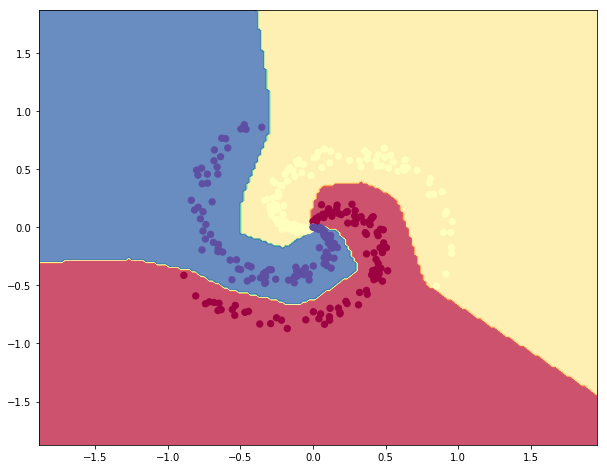

In [25]:
# Plot the decision boundary of the non-linear model on the dataset X
plot_decision_boundary(X, non_linear_model)

# Using TensorFlow

The above models worked well, but it was a little tedius to implement the gradients by hand. TensorFlow (TF) is an open source software library for numerical computation using data flow graphs. Nodes in the graph represent mathematical operations, while the graph edges represent the multidimensional data arrays (tensors) communicated between them. Besides offering computational speedups due to efficient backends, one of the big advantages is also that TensorFlow can be used to automatically derive the gradients of any mathematical expressions. It achieve this through a process called "[automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation)". 

TF builds a **computational graph** (a DAG structure where nodes represent mathematical operations and data flows on the edges connecting them). The graph chains together all the mathematical operations in order. Given such a graph for a neural network with a loss function, TF can then automatically "unroll" it backwards to compute the gradients that we had to compute by hand above! 

**NOTE**: Chat to your neighbour and the tutors to make sure you understand (at least conceptually) how this graph formalism is different from e.g. Numpy's (imperative) formalism before moving on.

**QUESTION**: What are the advantages and disadvantages of such a computational graph approach?

Now let's re-implement the above models using TensorFlow and see how it compares.

### Create a session

TensorFlow makes use of "[sessions](https://www.tensorflow.org/versions/r0.12/api_docs/python/client/session_management)" to encapsulate the environment and manage the resources within which graphs are executed. Sessions are also used to run the graph operations you are interested in. There are different ways to create sessions, but for now we will make use of the [interactive session](https://www.tensorflow.org/versions/r0.12/api_docs/python/client/session_management#InteractiveSession), which sets a default environment that will be shared across all code cells, and avoids the need to explicitly pass around a reference to the current session object.

In [38]:
# First we need to import TensorFlow.
import tensorflow as tf

tf.reset_default_graph() # Clear the graph between different invocations.
sess = tf.InteractiveSession() # Create and register the default Session.


### Define hyperparameters


In [39]:
### HYPERPARAMETERS
learning_rate = 1e-0
reg_lambda = 1e-3
training_iterations = 200    # 'epochs'
batch_size = X.shape[0]    # The whole dataset; i.e. batch gradient descent.
display_step = 10    # How often should we print our results
###

# Network Parameters
num_input = 2 # 2-dimensional input data
num_classes = 3 # red, yellow and blue!

### Graph input placeholders

Graphs provide an abstract definition of what computations we want to perform on our data. TensorFlow provides [placeholders](https://www.tensorflow.org/api_docs/python/tf/placeholder) as a means for injecting data into our graph at execution time, through a process called "feeding".

In [40]:
# placeholders for the inputs and labels. We will 'feed' these to the graph.
# Note that using 'None' for a dimension means that TensorFlow will adapt to
# whatever the size is of the input we feed in.
x_tf = tf.placeholder(tf.float32, [None, num_input])
y_tf = tf.placeholder(tf.int32, [None])

### Define helper functions
Let's create some helper functions that we can re-use in the Tensorflow models. We need fewer than before because Tensorflow already provides lots of useful functions out the box! 

**Note**: TensorFlow has a built-in cross entropy function that is more numerically stable than our implementation, and should be used under normal circumstances.

In [41]:
def cross_entropy_tf(predictions, targets):
    """Calculate the cross entropy loss given some model predictions and target (true) values."""
    targets = tf.one_hot(targets, num_classes)
    return tf.reduce_mean(-tf.reduce_sum(targets * tf.log(predictions), axis=1))

## Linear model

We construct a linear model with the same architecture as above. Notice how TensorFlow provides out-the-box many of the functions we had to previously define ourselves. There is another major difference between the TensorFlow code and Numpy code that may not be immediately apparant. In TensorFlow, when we call functions like tf.nn.softmax() we are not performing a computation, rather **we are defining an operation in the computation graph that gets run later** (when we feed in real data). 

**NOTE**:    This is called "define-**and**-run", and it is different from e.g. Numpy's "define-**by**-run" (imperative) approach. 

In [42]:
class TFLinearModel(object):
    def __init__(self):
        # Initialise the variables
        # Tensorflow variables can be updated automatically by optimisers.
        self.W = tf.Variable(W_init, dtype=tf.float32)
        self.b = tf.Variable(tf.zeros([num_classes]), dtype=tf.float32)

    def predictions(self, X):
        """Make predictions of classes (y values) given some inputs (X)."""
        logits = self.get_logits(X)

        # Compute the class probabilities.
        probs = tf.nn.softmax(logits)
        
        return probs
    
    def loss(self, probs, y):
        """Calculate the loss given model predictions and true targets."""
        data_loss = cross_entropy_tf(probs, y)
        regulariser = reg_lambda * tf.nn.l2_loss(self.W)
        return data_loss + regulariser
        
    def get_logits(self, X):
        # An affine function.
        return tf.add(tf.matmul(X, self.W), self.b)

![alt text](https://)Remember, up until now we've been defining (constructing) a computation graph. Now we can run this graph multiple times, feeding in our data, in a training loop. The training loop is a bit more complex than before, but by wrapping up our models in classes, we can again benefit from re-using the same training loop on multiple models.

In [43]:
def train_tf_model(tf_model, epochs, report_every):
    
    # Get the op which, when executed, will initialize the variables.
    init = tf.global_variables_initializer()
    
    # Get the model probabilities
    probs = tf_model.predictions(x_tf)
    
    # Get the model loss
    loss = tf_model.loss(probs, y_tf)
    
    # Create a Gradient Descent optimizer using our own learning rate.
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    
    # Now we create an op that computes the gradient of the loss with respect 
    # to the model parameters and performs one update to all of the parameters 
    # in the direction of their gradients.
    # NOTE: TensorFlow uses "automatic differentiation" to automatically derive 
    # the gradients of the loss wrt all trainable parameters for us! This is 
    # a huge saving as models get deeper and loss functions get more complex.
    optimizer_step = optimizer.minimize(loss)
    
    # Actually initialize the variables (run the op).
    sess.run(init)

    # Training cycle.
    for iteration in range(epochs):
            avg_cost = 0.
            total_batch = int(X.shape[0] / batch_size)

            # Loop over all batches.
            for i in range(total_batch):

                    batch_x = X[i * batch_size : (i + 1) * batch_size, :]
                    batch_y = y[i * batch_size : (i + 1) * batch_size]

                    # Run optimization op (backprop) and cost op (to get loss value).
                    _, c = sess.run([optimizer_step, loss], feed_dict={x_tf: batch_x,
                                                                                                                         y_tf: batch_y})
                    # Compute average loss.
                    avg_cost += c / total_batch

            # Display logs per iteration/epoch step.
            if iteration % report_every == 0:
                    print "Iteration:", '%04d' % (iteration + 1), "cost=", \
                            "{:.9f}".format(avg_cost)

    print "Optimization Finished!"

In [44]:
# Intialize our TensorFlow Linear Model
tf_linear_model = TFLinearModel()

# Train the model for 200 epochs
train_tf_model(tf_linear_model, 200, 10)

Iteration: 0001 cost= 1.100447059
Iteration: 0011 cost= 0.918495715
Iteration: 0021 cost= 0.852024496
Iteration: 0031 cost= 0.822591126
Iteration: 0041 cost= 0.807723522
Iteration: 0051 cost= 0.799528003
Iteration: 0061 cost= 0.794729173
Iteration: 0071 cost= 0.791794062
Iteration: 0081 cost= 0.789939761
Iteration: 0091 cost= 0.788739026
Iteration: 0101 cost= 0.787945986
Iteration: 0111 cost= 0.787414253
Iteration: 0121 cost= 0.787053227
Iteration: 0131 cost= 0.786805689
Iteration: 0141 cost= 0.786634445
Iteration: 0151 cost= 0.786515296
Iteration: 0161 cost= 0.786431968
Iteration: 0171 cost= 0.786373317
Iteration: 0181 cost= 0.786331892
Iteration: 0191 cost= 0.786302507
Optimization Finished!


**NOTE**: Our final cost (0.786) matches the final cost reached in our Numpy implementation above. This is not by accident, but because we used exactly the same initial values for the parameters, the same optimizer with the same update rules on the same data. (The exact value may be different if you changed some of the HyperParameters)

Notice how much less code we had to write for the TensorFlow model compared to the Numpy one earlier! TensorFlow is designed for deep learning and provides a number of common functions. In fact, it's possible to define a linear model like this in even fewer lines in TensorFlow, but we wanted to make this example as clear as possible!

### Visualizing the linear model's decision boundary



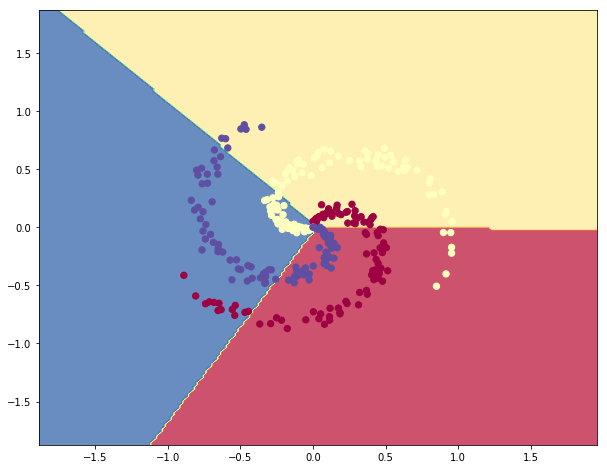

In [45]:
# Here we wrap the TensorFlow model so that it behaves more like a Numpy model 
# which the plot_decision_boundary function expects. Don't worry about 
# the details, it's just so we can visualise the decision boundary!

class TFModelWrapper(object):
    def __init__(self, model):
        self._model = model
    
    def get_logits(self, x): 
        return tf.get_default_session().run(self._model.get_logits(x_tf),
                                            feed_dict={x_tf : x,
                                                       y_tf : np.zeros(x.shape[0])})
    
wrapper = TFModelWrapper(tf_linear_model)
plot_decision_boundary(X, wrapper)

## Using a nonlinear classifier

Let's replicate the nonlinear model in TensorFlow. TensorFlow saves us from writing more code as the model becomes more complex. In particular, this is because we don't have to implement the derivatives ourselves!

In [46]:
class TFNonLinearModel(object):
    def __init__(self):
        # Initialise the variables
        # Tensorflow variables can be updated automatically by optimisers.
        self.W = tf.Variable(non_linear_W_init, dtype=tf.float32)
        self.b = tf.Variable(tf.zeros([num_hidden]), dtype=tf.float32)
        self.W2 = tf.Variable(non_linear_W2_init, dtype=tf.float32)
        self.b2 = tf.Variable(tf.zeros([num_classes]), dtype=tf.float32)

    def predictions(self, X):
        """Make predictions of classes (y values) given some inputs (X)."""
        logits = self.get_logits(X)

        # Compute the class probabilities.
        probs = tf.nn.softmax(logits)
        
        return probs
    
    def loss(self, probs, y):
        """Calculate the loss given model predictions and true targets."""
        data_loss = cross_entropy_tf(probs, y)
        regulariser = reg_lambda * tf.nn.l2_loss(self.W) + reg_lambda * tf.nn.l2_loss(self.W2)
        return data_loss + regulariser
        
    def get_logits(self, X):
        hidden_output = self.hidden_layer(X)
        logits = tf.add(tf.matmul(hidden_output, self.W2), self.b2)
        return logits
    
    def hidden_layer(self, X):
        linear = tf.add(tf.matmul(X, self.W), self.b)
        return tf.nn.relu(linear)

In [47]:
# Create an instance of the TensorFlow Non Linear model
tf_non_linear_model = TFNonLinearModel()

# Train it for 10000 epochs
train_tf_model(tf_non_linear_model, 10000, 1000)

Iteration: 0001 cost= 3.430856705
Iteration: 1001 cost= 0.246243447
Iteration: 2001 cost= 0.246072069
Iteration: 3001 cost= 0.245952770
Iteration: 4001 cost= 0.245862275
Iteration: 5001 cost= 0.245789438
Iteration: 6001 cost= 0.245739818
Iteration: 7001 cost= 0.245699793
Iteration: 8001 cost= 0.245663330
Iteration: 9001 cost= 0.245630622
Optimization Finished!


### Visualizing the nonlinear model's decision boundary

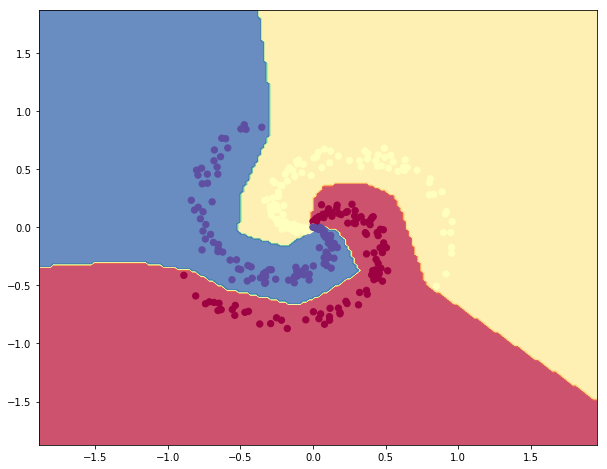

In [34]:
wrapper = TFModelWrapper(tf_non_linear_model)
plot_decision_boundary(X, wrapper)

This decision boundary should look very similar to the one obtained earlier, which is of course the goal. Congrats!

## EXTRA: The effect of regularization on the decision boundary

Change the `l2_lambda` parameter and observe the effect it has on the decision boundary. 

**QUESTION**: Can you explain why this happens?


Setting reg_lambda to  0.0
Iteration: 0001 cost= 3.293793201
Iteration: 1001 cost= 0.045659613
Iteration: 2001 cost= 0.034318779
Iteration: 3001 cost= 0.029046485
Iteration: 4001 cost= 0.025907867
Iteration: 5001 cost= 0.023753971
Iteration: 6001 cost= 0.022159759
Iteration: 7001 cost= 0.020927856
Iteration: 8001 cost= 0.019980222
Iteration: 9001 cost= 0.019212436
Optimization Finished!
Setting reg_lambda to  0.0001
Iteration: 0001 cost= 3.307478905
Iteration: 1001 cost= 0.076687112
Iteration: 2001 cost= 0.071806177
Iteration: 3001 cost= 0.070404142
Iteration: 4001 cost= 0.069816492
Iteration: 5001 cost= 0.069518209
Iteration: 6001 cost= 0.069387846
Iteration: 7001 cost= 0.069318637
Iteration: 8001 cost= 0.069280162
Iteration: 9001 cost= 0.069252878
Optimization Finished!
Setting reg_lambda to  0.001
Iteration: 0001 cost= 3.430649281
Iteration: 1001 cost= 0.246243224
Iteration: 2001 cost= 0.246076643
Iteration: 3001 cost= 0.245949924
Iteration: 4001 cost= 0.245859504
Iteration: 5001 co

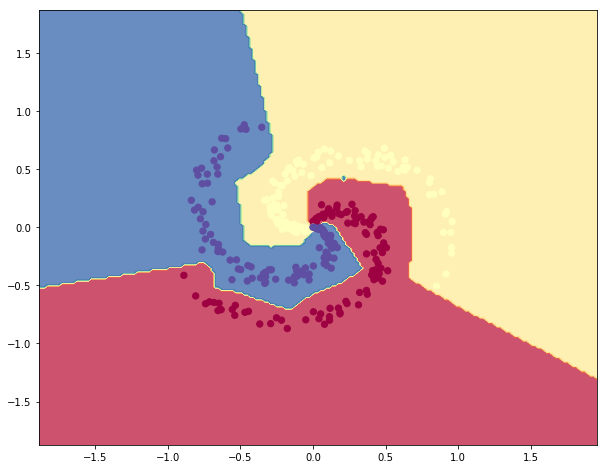

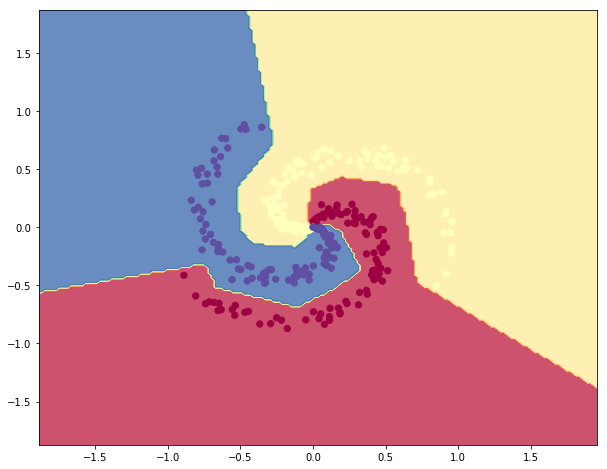

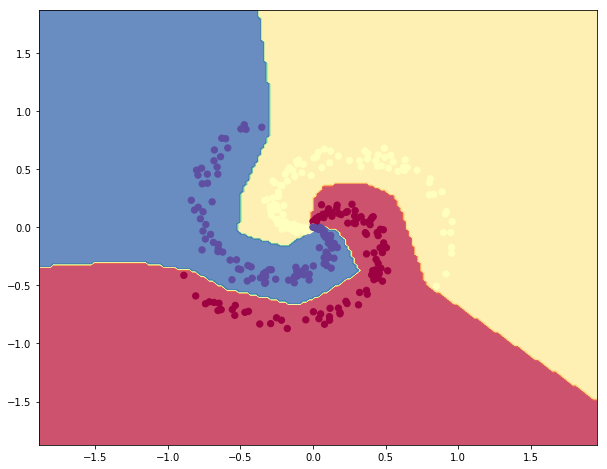

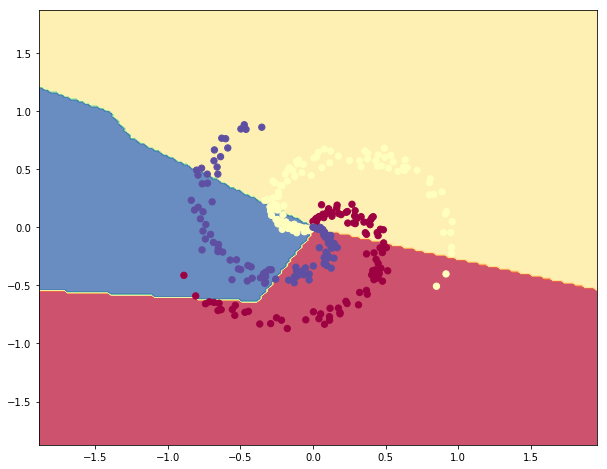

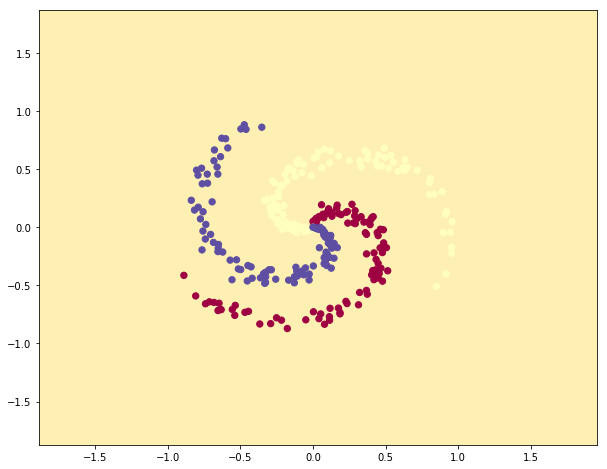

In [35]:
### CHANGE ME: 
### E.g. for reg_lambda = [0., 1e-4, 1e-3, 1e-1, 1.]:

for v in [0., 1e-4, 1e-3, 1e-1, 1.]:
    print "Setting reg_lambda to ", v
    reg_lambda = v
    tf_non_linear_model = TFNonLinearModel()
    train_tf_model(tf_non_linear_model, 10000, 1000)
    wrapper = TFModelWrapper(tf_non_linear_model)
    plot_decision_boundary(X, wrapper)

# More resources

* TensorFlow has a great website where you can play with different toy datasets, different model and training choices, and see how that affects model performance: http://playground.tensorflow.org/
* deeplearn.js is a library for doing deep learning directly in the browser: https://pair-code.github.io/deeplearnjs/. Have a look at the "Model Builder" section and play around with training a few feedforward models on MNIST.


# NB: Before you go (5min)

Pair up with someone else and go through the questions in "Learning Objectives" at the top. Take turns explaining each of these to each other, and be sure to ask the tutors if you're both unsure!

# Acknowledgements

* http://cs.stanford.edu/people/karpathy/cs231nfiles/minimal_net.html 



# Feedback

Please send any bugs and comments to dli-practicals@googlegroups.com.